# Spatial Analysis

## Import Python Library

In [1]:
%pip install -q numpy
import numpy as np

%pip install -q pandas
import pandas as pd

%pip install -q geopandas
import geopandas as gpd

%pip install -q contextily
import contextily

%pip install -q matplotlib
import matplotlib.pyplot as plt

%pip install -q git+https://github.com/azamaulanaaa/pyunduh
import pyunduh

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Default Constant

In [2]:
REPO = "https://github.com/azamaulanaaa/jatim-on-data/raw/master"

## Read Data

### Spatial Data

In [3]:
gdf = gpd.read_file(
    filename = pyunduh.Default(
        "{}/sample data/kabupaten dan kota di jawa timur.gpkg".format(REPO),
    ),
).to_crs(
    epsg = 3857,
).sort_values(
    by = ["Tingkat", "Wilayah"],
    ignore_index = True,
)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Tingkat   38 non-null     object  
 1   Wilayah   38 non-null     object  
 2   geometry  38 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.0+ KB


### Persentase Penduduk Berdasarkan Kepemilikan Jaminan Kesehatan

#### Laki-Laki

In [4]:
dfJakesL = pd.read_csv(
    filepath_or_buffer = pyunduh.Default(
        "{}/sample data/persentase laki-laki berdasarkan jaminan kesehatan.csv".format(REPO),
    ),
    index_col = 0,
).sort_values(
    by = ["Tingkat", "Wilayah"],
    ignore_index = True,
)
dfJakesL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Wilayah                     38 non-null     object
 1   Tingkat                     38 non-null     object
 2   Penerima Bantuan Iuran      38 non-null     int64 
 3   Non Penerima Bantuan Iuran  38 non-null     int64 
 4   Jamkesda                    38 non-null     int64 
 5   Asuransi Swasta             38 non-null     int64 
 6   Perusahaan/Kantor           38 non-null     int64 
 7   Tidak Punya                 38 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 2.5+ KB


#### Perempuan

In [5]:
dfJakesP= pd.read_csv(
    filepath_or_buffer = pyunduh.Default(
        "{}/sample data/persentase perempuan berdasarkan jaminan kesehatan.csv".format(REPO),
    ),
    index_col = 0,
).sort_values(
    by = ["Tingkat", "Wilayah"],
    ignore_index = True,
)
dfJakesP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Wilayah                     38 non-null     object
 1   Tingkat                     38 non-null     object
 2   Penerima Bantuan Iuran      38 non-null     int64 
 3   Non Penerima Bantuan Iuran  38 non-null     int64 
 4   Jamkesda                    38 non-null     int64 
 5   Asuransi Swasta             38 non-null     int64 
 6   Perusahaan/Kantor           38 non-null     int64 
 7   Tidak Punya                 38 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 2.5+ KB


#### Gabungan

In [15]:
dfJakes = pd.concat([
    dfJakesL[["Wilayah", "Tingkat"]],
    dfJakesL.drop(columns = ["Wilayah", "Tingkat"]) + dfJakesP.drop(columns = ["Wilayah", "Tingkat"])
], axis = 1)
dfJakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Wilayah                     38 non-null     object
 1   Tingkat                     38 non-null     object
 2   Penerima Bantuan Iuran      38 non-null     int64 
 3   Non Penerima Bantuan Iuran  38 non-null     int64 
 4   Jamkesda                    38 non-null     int64 
 5   Asuransi Swasta             38 non-null     int64 
 6   Perusahaan/Kantor           38 non-null     int64 
 7   Tidak Punya                 38 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 2.5+ KB


### Sensus Penduduk

In [6]:
dfSensus = pd.read_csv(
    filepath_or_buffer = pyunduh.Default(
        "{}/sample data/sensus penduduk.csv".format(REPO),
    ),
    index_col = 0,
).sort_values(
    by = ["Tingkat", "Wilayah"],
    ignore_index = True,
)
dfSensus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Kode                 38 non-null     int64 
 1   Tingkat              38 non-null     object
 2   Wilayah              38 non-null     object
 3   Laki-laki            38 non-null     int64 
 4   Perempuan            38 non-null     int64 
 5   Total Jenis Kelamin  38 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.9+ KB


### Covid Cases

In [38]:
dfCovid = pd.read_csv(
    filepath_or_buffer = pyunduh.Default(
        "{}/sample data/covid cases.csv".format(REPO),
    ),
    index_col = 0,
).sort_values(
    by = ["Tingkat", "Wilayah"],
    ignore_index = True,
)
dfCovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Wilayah        38 non-null     object
 1   Tingkat        38 non-null     object
 2   Bergejala      38 non-null     int64 
 3   Tanpa Gejala   38 non-null     int64 
 4   Tanpa Riwayat  38 non-null     int64 
 5   Konfirmasi     38 non-null     int64 
 6   Sembuh         38 non-null     int64 
 7   Meninggal      38 non-null     int64 
 8   Rapid          38 non-null     int64 
 9   Rapid Reaktif  38 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 3.1+ KB


### Persentase Ijazah Terakhir

#### Laki-Laki

In [17]:
dfIjazahL = pd.read_csv(
    filepath_or_buffer = pyunduh.Default(
        "{}/sample data/persentase laki-laki berdasarkan ijazah terakhir.csv".format(REPO),
    ),
    index_col = 0,
).sort_values(
    by = ["Tingkat", "Wilayah"],
    ignore_index = True,
)
dfIjazahL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Wilayah                38 non-null     object
 1   Tingkat                38 non-null     object
 2   Tidak Punya Ijazah SD  38 non-null     int64 
 3   SD/MI/Paket A          38 non-null     int64 
 4   SMP/MTs/Paket B        38 non-null     int64 
 5   SMA/MA/Paket C         38 non-null     int64 
 6   SMK/MAK                38 non-null     int64 
 7   D1/D2/D3               38 non-null     int64 
 8   Profesi                38 non-null     int64 
 9   DIV/S1/S2/S3           38 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 3.1+ KB


#### Perempuan

In [18]:
dfIjazahP = pd.read_csv(
    filepath_or_buffer = pyunduh.Default(
        "{}/sample data/persentase perempuan berdasarkan ijazah terakhir.csv".format(REPO),
    ),
    index_col = 0,
).sort_values(
    by = ["Tingkat", "Wilayah"],
    ignore_index = True,
)
dfIjazahP.head()

,Wilayah,Tingkat,Tidak Punya Ijazah SD,SD/MI/Paket A,SMP/MTs/Paket B,SMA/MA/Paket C,SMK/MAK,D1/D2/D3,Profesi,DIV/S1/S2/S3
0,Bangkalan,Kabupaten,2611,4090,1778,1254,67,35,0,165
1,Banyuwangi,Kabupaten,2471,2569,2021,1786,416,137,16,584
2,Blitar,Kabupaten,1860,2821,2594,1462,533,148,0,583
3,Bojonegoro,Kabupaten,2195,2885,2268,1764,235,96,0,556
4,Bondowoso,Kabupaten,3786,2645,1624,1112,214,42,0,578


#### Gabungan

In [19]:
dfIjazah = pd.concat([
    dfIjazahL[["Wilayah", "Tingkat"]],
    dfIjazahL.drop(columns = ["Wilayah", "Tingkat"]) + dfIjazahP.drop(columns = ["Wilayah", "Tingkat"])
], axis = 1)
dfIjazah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Wilayah                38 non-null     object
 1   Tingkat                38 non-null     object
 2   Tidak Punya Ijazah SD  38 non-null     int64 
 3   SD/MI/Paket A          38 non-null     int64 
 4   SMP/MTs/Paket B        38 non-null     int64 
 5   SMA/MA/Paket C         38 non-null     int64 
 6   SMK/MAK                38 non-null     int64 
 7   D1/D2/D3               38 non-null     int64 
 8   Profesi                38 non-null     int64 
 9   DIV/S1/S2/S3           38 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 3.1+ KB


## Analysis

### Maps and Borders

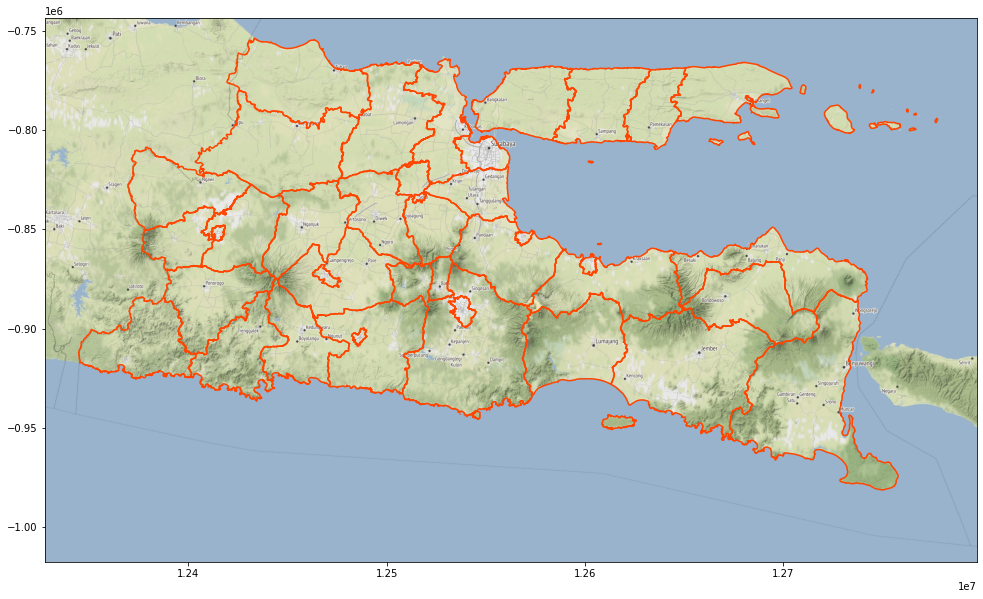

In [22]:
basemap, basemap_extent = contextily.bounds2img(*gdf.total_bounds, zoom=10)

fig = plt.gcf()
fig.set_size_inches(20, 10)
ax = fig.add_subplot()

ax.imshow(basemap, extent=basemap_extent)
gdf.boundary.plot(ax=ax, color="orangered")

plt.show()

### Neighbors Matrix

In [23]:
dfNeighbors = pd.DataFrame()
for index, row in gdf.iterrows():
    dfNeighbors[index] = gdf.geometry.distance(row.geometry) == 0
dfNeighbors.info()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Mapping Sensus Penduduk

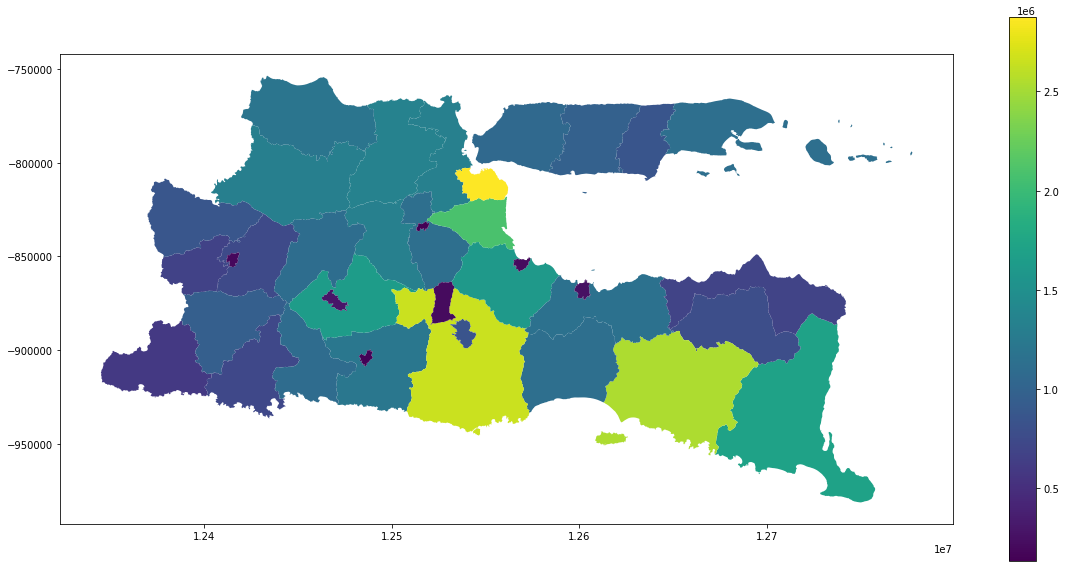

In [29]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
ax = fig.add_subplot()

gdf.plot(
    column = dfSensus["Total Jenis Kelamin"],
    legend = True,
    ax = ax,
)

plt.show()

#### Kepadatan Penduduk

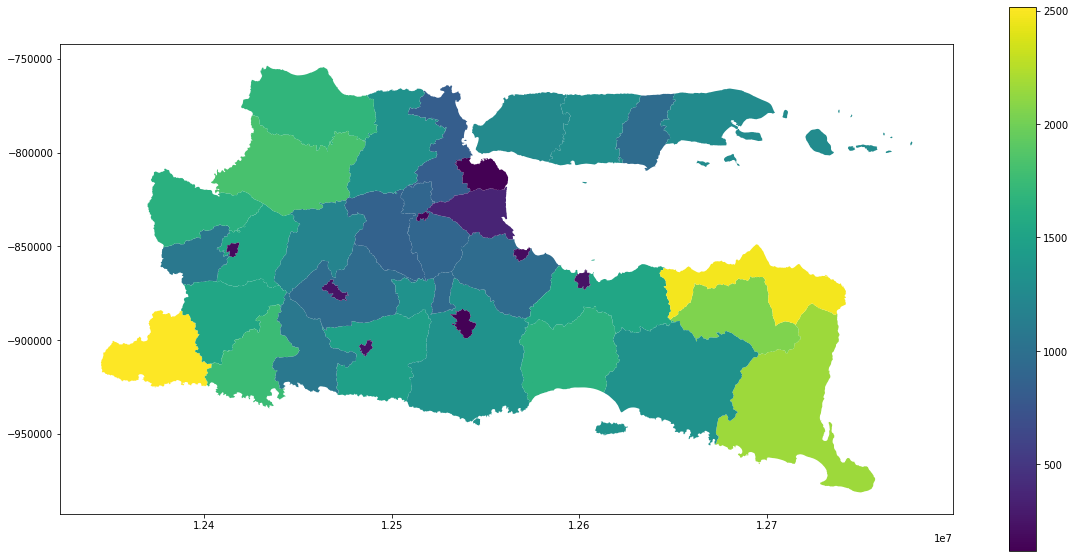

In [31]:
sKepadatan = gdf.area / dfSensus["Total Jenis Kelamin"]

fig = plt.gcf()
fig.set_size_inches(20, 10)
ax = fig.add_subplot()

gdf.plot(
    column =  sKepadatan,
    legend = True,
    ax = ax,
)

plt.show()

### Mapping Penduduk yang Tidak Memiliki Jaminan Kesehatan

#### Persentase

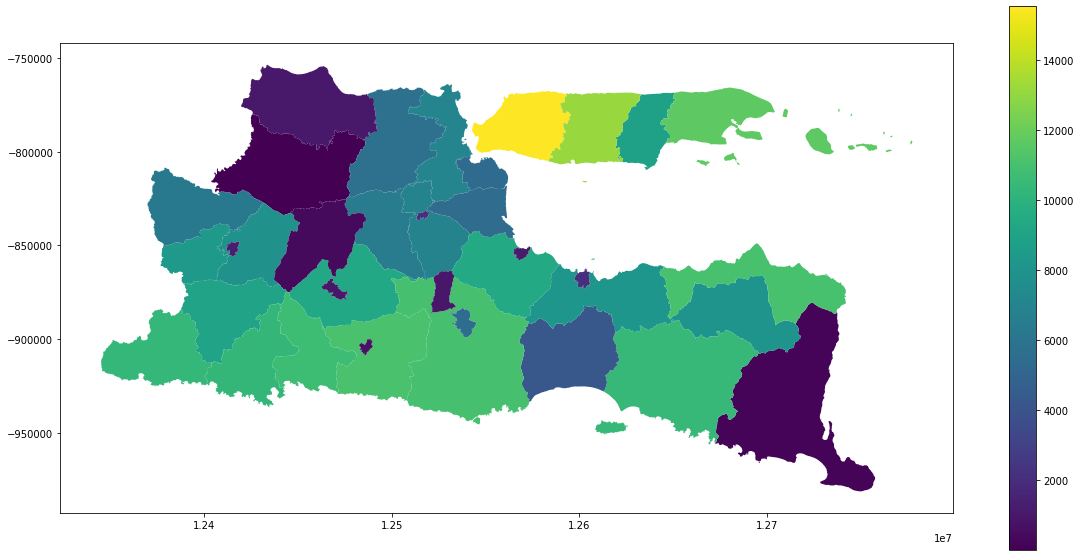

In [32]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
ax = fig.add_subplot()

gdf.plot(
    column = dfJakes["Tidak Punya"],
    legend = True,
    ax = ax,
)

plt.show()

#### Estimasi Dalam Satuan Orang

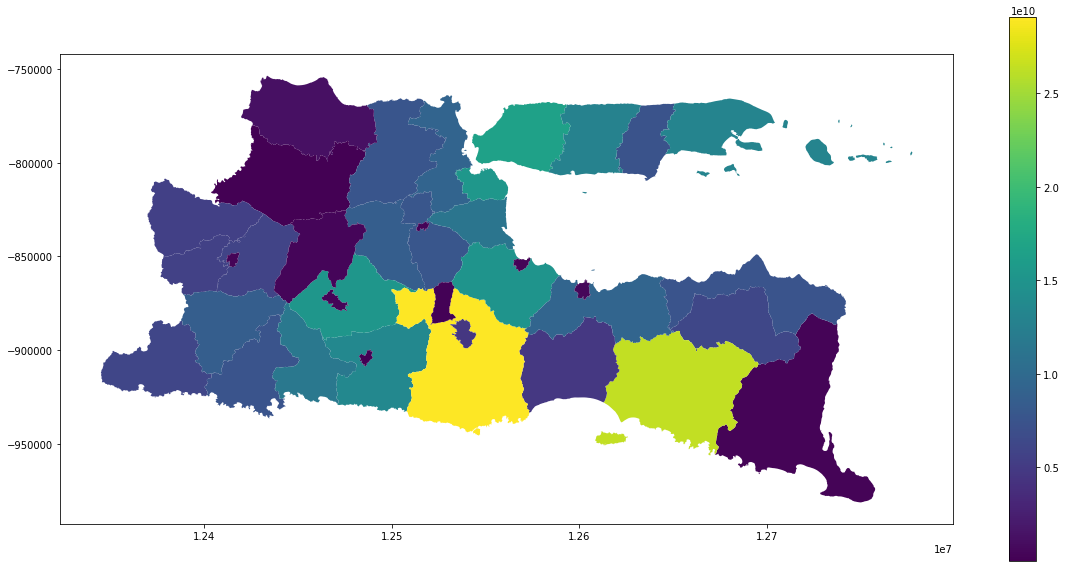

In [33]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
ax = fig.add_subplot()

gdf.plot(
    column = dfSensus["Total Jenis Kelamin"] * dfJakes["Tidak Punya"],
    legend = True,
    ax = ax,
)

plt.show()

### Mapping Penduduk yang Memiliki Jaminan Kesehatan dari Bantuan Negara

#### Persentase

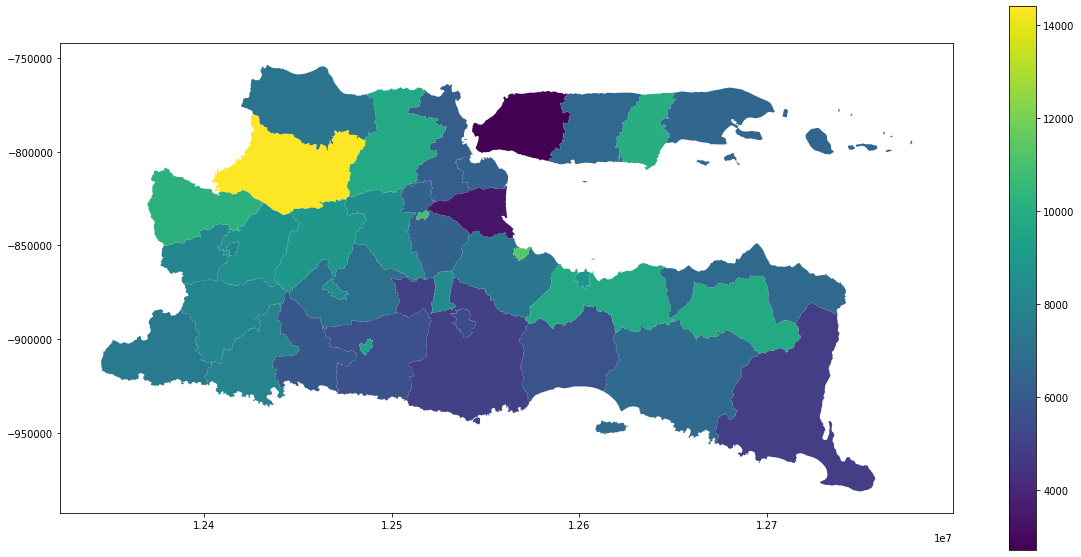

In [34]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
ax = fig.add_subplot()

gdf.plot(
    column = dfJakes["Penerima Bantuan Iuran"],
    legend = True,
    ax = ax,
)

plt.show()

#### Estimasi Dalam Satuan Orang

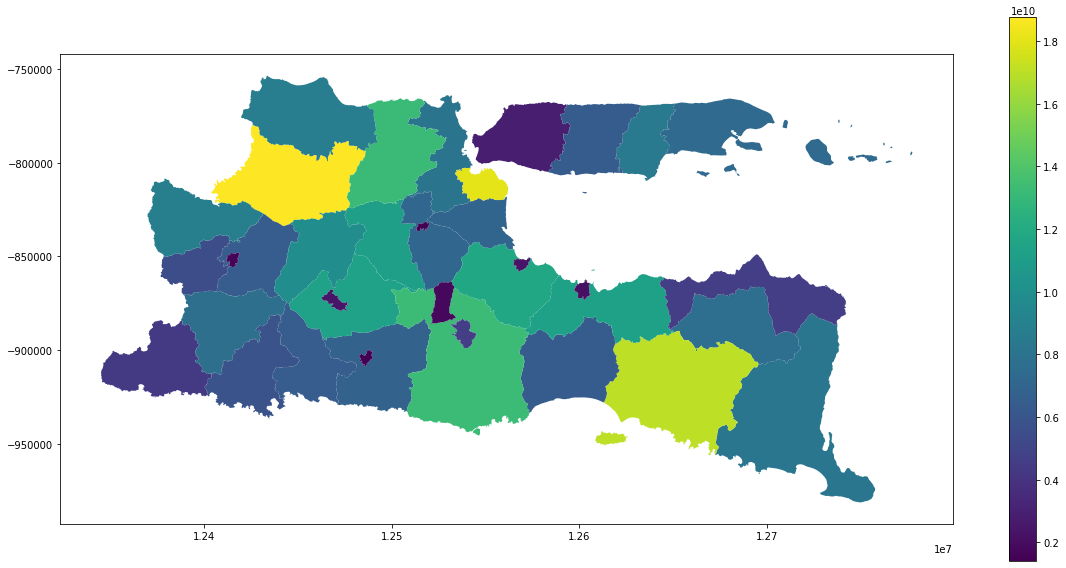

In [35]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
ax = fig.add_subplot()

gdf.plot(
    column = dfSensus["Total Jenis Kelamin"] * dfJakes["Penerima Bantuan Iuran"],
    legend = True,
    ax = ax,
)

plt.show()

### Covid Cases

#### Kasus Meninggal

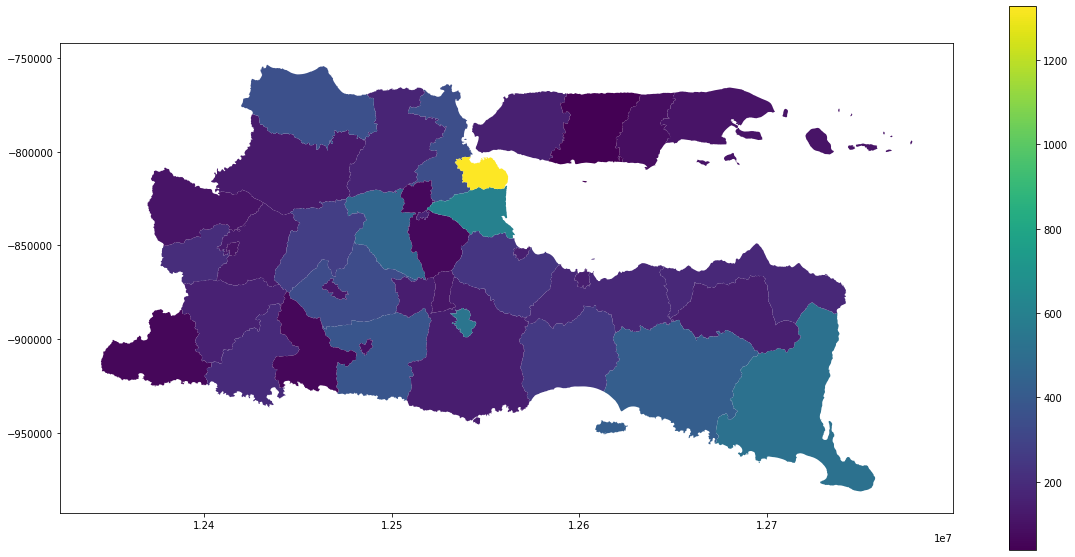

In [39]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
ax = fig.add_subplot()

gdf.plot(
    column = dfCovid["Meninggal"],
    legend = True,
    ax = ax,
)

plt.show()

#### Rapid

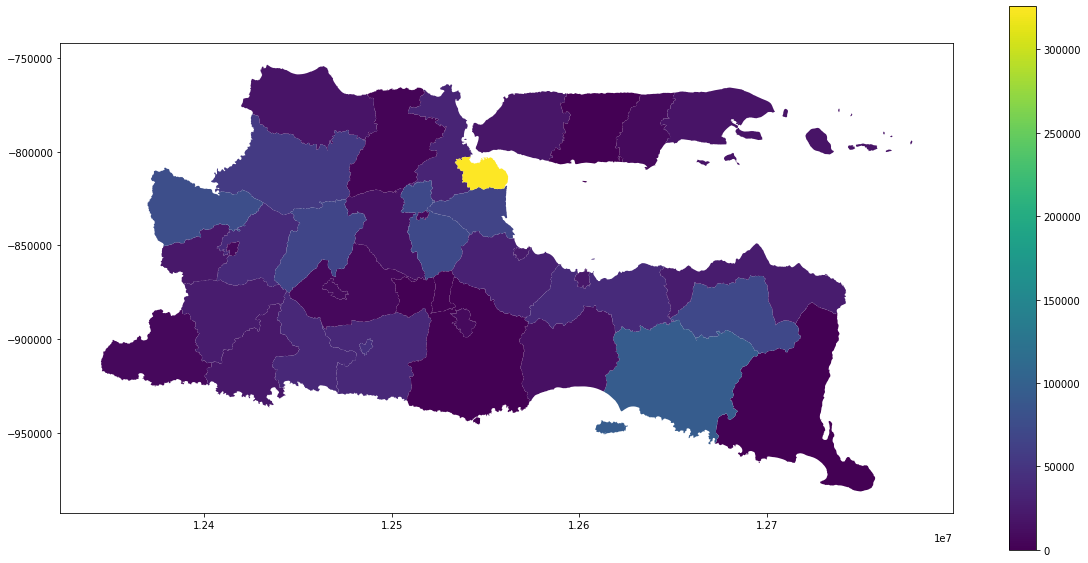

In [41]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
ax = fig.add_subplot()

gdf.plot(
    column = dfCovid["Rapid"],
    legend = True,
    ax = ax,
)

plt.show()

### Mapping Penduduk Berdasarkan Kepemilikan Ijazah

#### Persentase

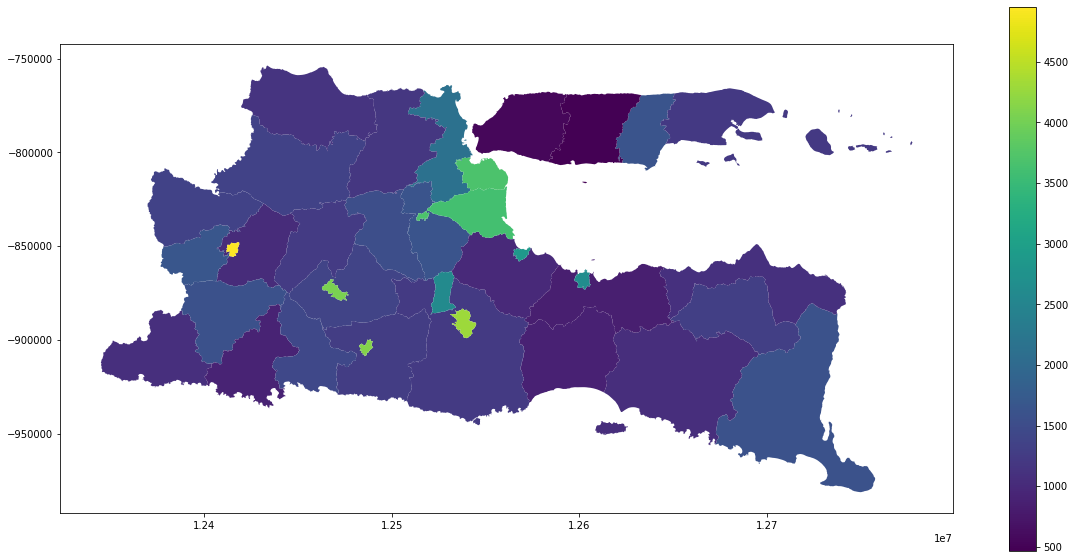

In [43]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
ax = fig.add_subplot()

gdf.plot(
    column = (dfIjazah["DIV/S1/S2/S3"] + dfIjazah["Profesi"] + dfIjazah["D1/D2/D3"]),
    legend = True,
    ax = ax,
)

plt.show()

#### Estimasi dalam orang

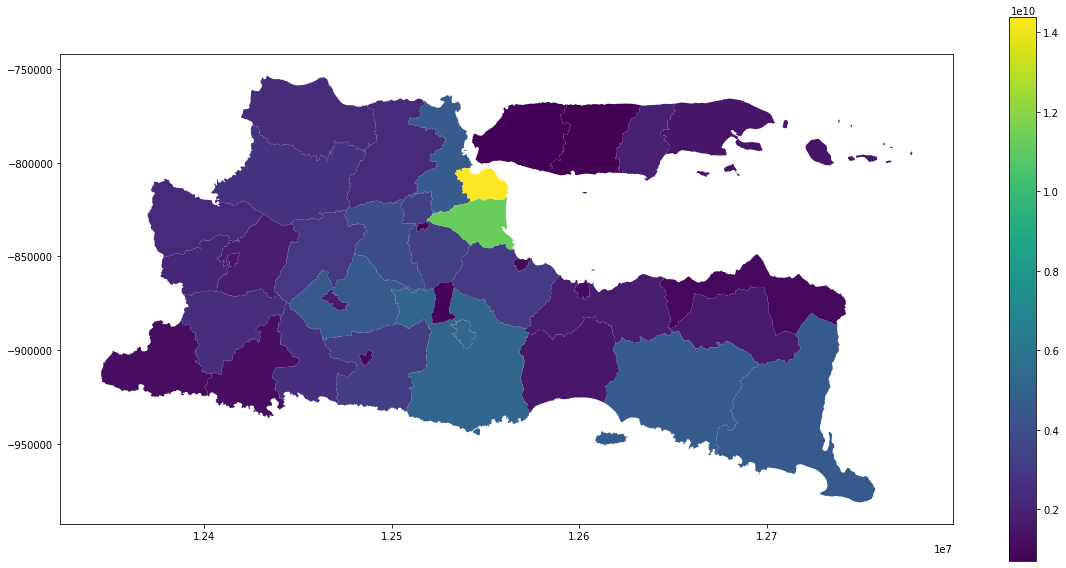

In [44]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
ax = fig.add_subplot()

gdf.plot(
    column = (dfIjazah["DIV/S1/S2/S3"] + dfIjazah["Profesi"] + dfIjazah["D1/D2/D3"] + dfIjazah["SMK/MAK"]) * dfSensus["Total Jenis Kelamin"],
    legend = True,
    ax = ax,
)

plt.show()

### Outlier

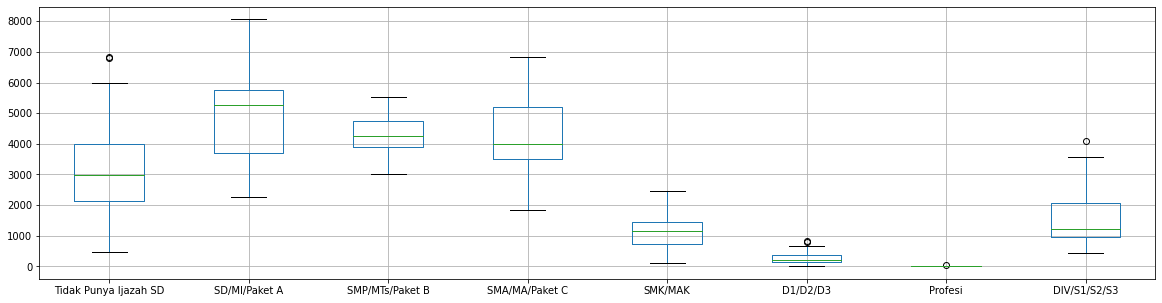

In [45]:
fig = plt.gcf()
fig.set_size_inches((20,5))
ax = fig.add_subplot()

dfIjazah.boxplot(ax=ax)

plt.show()

In [46]:
def outlier(s: pd.Series):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = (q3-q1)
    minn = q1 - 1.5 * iqr
    maxx = q3 + 1.5 * iqr
    
    return s[(s > maxx) | (s < minn)]

In [55]:
pd.concat([
    dfIjazah.iloc[:,:2],
    dfIjazah.iloc[:,2:].apply(outlier),
], axis = 1).dropna()

,Wilayah,Tingkat,Tidak Punya Ijazah SD,SD/MI/Paket A,SMP/MTs/Paket B,SMA/MA/Paket C,SMK/MAK,D1/D2/D3,Profesi,DIV/S1/S2/S3
